## Business Question:
We aim to explore the relationship between lifestyle choices, physical health indicators, and the risk of diabetes. In particular, we will analyze factors such as physical activity, smoking, alcohol consumption, BMI, and other health indicators correlate with diabetes risk. Beside that, we will consider building a predictive model to identify individuals who are at high risk of developing diabetes based on these health indicators.

Diabetes is a significant public health concern, and early detection of risk factors can help preventative healthcare initiatives. Therefore, we hope that our findings could help public health organizations/medical professionals strategize diabetes educational initiatives and clinical decision making better while supporting patients to mitigate their diabetes risks or manage this disease more effectively.


## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, t
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from IPython.display import Markdown
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.neural_network import MLPClassifier
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

## Data Accessing & Wrangling

In [ ]:
df = pd.read_csv('diabetes_health_indicators.csv')

In [ ]:
df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [ ]:
df.shape

(253680, 22)

### Data Structure Assessment

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

#### Data Descriptions:
|  Column                                        | Description  
|  :------                                       |   -----:
|  Diabetes_012                                  |  0 = no diabetes; 1 = prediabetes; 2 = diabetes   
|  HighBP                                        |  0 = no high Blood Pressure; 1 = high Blood Pressure
|  HighChol                                      |  0 = no high Cholesterol; 1 = high Cholesterol
|  CholCheck                                     |  0 = no cholesterol check in 5 years; <br> 1 = yes cholesterol check in 5 years
|  BMI                                           |  Body Mass Index
|  Smoker                                        |  Have you smoked at least 100 cigarettes in your entire life? <br> 0 = no ; 1 = yes
|  Stroke                                        |  (Ever told) you had a stroke? 0 = no; 1 = yes
|  HeartDiseaseorAttack                          |  Coronary Heart Disease (CHD) <br> or Myocardial Infarction (MI)? <br> 0 = no; 1 = yes  
|  PhysActivity                                  |  Physical activity in past 30 days - not including job? <br> 0 = no; 1 = yes
|  Fruits                                        |  Consume Fruit 1 or more times per day? <br> 0 = no; 1 = yes  
|  Veggies                                       |  Consume Vegetables 1 or more times per day? <br> 0 = no; 1 = yes
|  HvyAlcoholConsump                             |  Heavy drinkers ( men more than 14 drinks per week <br> or women more than 7 drinks per week)? <br> 0 = no; 1 = yes  
|  AnyHealthcare                                 |   Have any kind of health care coverage? <br> 0 = no; 1 = yes
|  NoDocbcCost                                   |  Was there a time in the past 12 months when you needed <br> to see a doctor but could not because of cost? <br> 0 = no; 1 = yes
|  GenHlth                                       |  Would you say that in general your health on scale 1-5 is: <br> 1 = excellent, 2 = very good, <br> 3 = good. 4 = fair, 5 = poor
|  MentHlth.                                     |  For how many days during the past 30 days was your <br> mental health not good? <br> scale 1-30 days  
| PhysHlth                                       |  For how many days during the past 30 days was your <br> physical health not good? <br> scale 1-30 days
| DiffWalk                                       |  Do you have serious difficulty walking or climbing stairs? <br> 0 = no; 1 = yes
| Sex                                            | 0 = female; 1 = male
| Age                                            | 1 = 18-24 y/o; 2 = 25-29; 3 = 30-34; <br> 4 = 35-39; 5 = 40-44; 6 = 45-49; <br> 7 = 50-54; 8 = 55-59; 9 = 60-64; 10 = 65-69; <br> 11 = 70-74; 12 = 75-79; 13 = 80 or older
| Education                                      | 1 = Never attended school or only kindergarten; 2 = Grades 1-8; <br> 3 = Grades 9-11; 4 = Grade 12 or GED (High school graduate); <br> 5 = College 1-3 years (Some college or technical school); <br> 6 = College 4 years or more
| Income                                         | 1 = less than 10,000; 2 = less than 15,000; <br> 3 = less than 20,000; 4 = less than 25,000; <br> 5 = less than 35,000; 6 = less than 50,000; <br> 7 = less than 75,000; 8 = 75,000 or more.

### Data Transformation

In [ ]:
# For machine learning purpose, we will convert Diabetes variable to binary with
# 0 = no diabetes and 1 = prediabetes/diabetes
df['Diabetes_012'] = df['Diabetes_012'].replace(2, 1)
df = df.rename(columns={'Diabetes_012':'Diabetes_binary'})

In [ ]:
df['Diabetes_binary'].value_counts()

,count
Diabetes_binary,
0.0,213703
1.0,39977


In [ ]:
# Converting binary variables from float to int64
binary_vars = ['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost','DiffWalk', 'Sex']
for var in binary_vars:
    df[var] = df[var].astype('int64')

In [ ]:
# Converting categorical variables from float to category dtype
category_vars = ['Age', 'Education', 'Income','GenHlth']
for var in category_vars:
   df[var] = df[var].astype('category')

In [ ]:
# Converting time-based variables from float to integer
df['MentHlth'] = df['MentHlth'].astype('int64')
df['PhysHlth'] = df['PhysHlth'].astype('int64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   Diabetes_binary       253680 non-null  int64   
 1   HighBP                253680 non-null  int64   
 2   HighChol              253680 non-null  int64   
 3   CholCheck             253680 non-null  int64   
 4   BMI                   253680 non-null  float64 
 5   Smoker                253680 non-null  int64   
 6   Stroke                253680 non-null  int64   
 7   HeartDiseaseorAttack  253680 non-null  int64   
 8   PhysActivity          253680 non-null  int64   
 9   Fruits                253680 non-null  int64   
 10  Veggies               253680 non-null  int64   
 11  HvyAlcoholConsump     253680 non-null  int64   
 12  AnyHealthcare         253680 non-null  int64   
 13  NoDocbcCost           253680 non-null  int64   
 14  GenHlth               253680 non-nul

### Checking Missing Values, Unique Values and Duplicates

In [ ]:
df.isnull().sum()

,0
Diabetes_binary,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
HeartDiseaseorAttack,0
PhysActivity,0
Fruits,0


In [ ]:
# Print unique values
cols = df.columns
for col in cols:
    print(col)

    # get a list of unique values
    unique = df[col].unique()
    print(unique, '\n====================================\n\n')

Diabetes_binary
[0 1] 


HighBP
[1 0] 


HighChol
[1 0] 


CholCheck
[1 0] 


BMI
[40. 25. 28. 27. 24. 30. 34. 26. 33. 21. 23. 22. 38. 32. 37. 31. 29. 20.
 35. 45. 39. 19. 47. 18. 36. 43. 55. 49. 42. 17. 16. 41. 44. 50. 59. 48.
 52. 46. 54. 57. 53. 14. 15. 51. 58. 63. 61. 56. 74. 62. 64. 66. 73. 85.
 60. 67. 65. 70. 82. 79. 92. 68. 72. 88. 96. 13. 81. 71. 75. 12. 77. 69.
 76. 87. 89. 84. 95. 98. 91. 86. 83. 80. 90. 78.] 


Smoker
[1 0] 


Stroke
[0 1] 


HeartDiseaseorAttack
[0 1] 


PhysActivity
[0 1] 


Fruits
[0 1] 


Veggies
[1 0] 


HvyAlcoholConsump
[0 1] 


AnyHealthcare
[1 0] 


NoDocbcCost
[0 1] 


GenHlth
[5.0, 3.0, 2.0, 4.0, 1.0]
Categories (5, float64): [1.0, 2.0, 3.0, 4.0, 5.0] 


MentHlth
[18  0 30  3  5 15 10  6 20  2 25  1  4  7  8 21 14 26 29 16 28 11 12 24
 17 13 27 19 22  9 23] 


PhysHlth
[15  0 30  2 14 28  7 20  3 10  1  5 17  4 19  6 12 25 27 21 22  8 29 24
  9 16 18 23 13 26 11] 


DiffWalk
[1 0] 


Sex
[0 1] 


Age
[9.0, 7.0, 11.0, 10.0, 8.0, ..., 2.0, 12.0, 5.

In [ ]:
duplicates = df[df.duplicated()]
print(f"Number of Duplicates: {len(duplicates)}")

Number of Duplicates: 23968


In [ ]:
duplicates

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
1242,1,1,1,1,27.0,1,0,0,0,0,...,1,0,5.0,0,30,1,0,10.0,4.0,5.0
1563,0,0,0,1,21.0,1,0,0,1,1,...,1,0,1.0,0,0,0,0,4.0,6.0,8.0
2700,0,0,0,1,32.0,0,0,0,1,1,...,1,0,2.0,0,0,0,0,5.0,6.0,8.0
3160,0,0,0,1,21.0,0,0,0,1,1,...,1,0,1.0,0,0,0,0,4.0,6.0,8.0
3332,0,0,0,1,24.0,0,0,0,1,1,...,1,0,1.0,0,0,0,1,9.0,6.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253492,1,1,1,1,33.0,0,0,0,1,1,...,1,0,3.0,0,0,0,1,9.0,6.0,6.0
253550,0,0,0,1,25.0,0,0,0,1,1,...,1,0,1.0,0,0,0,0,7.0,6.0,8.0
253563,0,0,1,1,24.0,1,0,0,1,1,...,1,0,2.0,0,0,0,1,8.0,6.0,8.0
253597,0,0,0,1,24.0,0,0,0,1,1,...,1,0,2.0,0,0,0,0,5.0,6.0,8.0


Explanation for keeping duplicates: Since our dataset is deprived from a public survey generated by the Center for Diseases Control and Prevention, it contains over 100 variables. For the purpose of this Machine Learning project, we only utilize a subset of this survey data with the most relevant variables in predicting diabetes risk. Therefore, there is a possibility that a significant number of records share similar clinical profiles, making them become duplicates. We will keep these duplicates as removing them entirely will cause discrepancies in our model(s).

## Exploratory Data Analysis

### Statistical Summary

#### Statistical Measures

In [ ]:
#Copy the dataset for EDA to avoid modifying the original dataframe (as requested)
df_eda = df.copy()

In [ ]:
# Statistical Summary of Numerical Variables
# This will display key statistics like mean, standard deviation, quartiles, and skewness
# Skewness helps detect asymmetric distributions (right/left skew)

numeric_cols = df_eda.select_dtypes(include=['int64', 'float64']).columns
stat_summary = df_eda[numeric_cols].describe().T
stat_summary['Skewness'] = df_eda[numeric_cols].skew()
stat_summary
# Key findings:
# BMI and Physical Health Days are right-skewed, meaning many individuals have low values, but a few have very high values
# Some variables (e.g., HighBP, HighChol) are binary (0 or 1)
# Diabetes cases (1s) are less frequent than non-diabetic cases (0s)

,count,mean,std,min,25%,50%,75%,max,Skewness
Diabetes_binary,253680.0,0.157588,0.364355,0.0,0.0,0.0,0.0,1.0,1.879563
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0,0.286904
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0,0.307075
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0,-4.881271
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0,2.122004
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0,0.228810
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0,4.657340
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0,2.778742
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0,-1.195546
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0,-0.557500


#### Outlier Analysis

In [ ]:
# Outlier Detection using the Interquartile Range (IQR) method
# Outliers are values significantly higher or lower than the majority of data
# The IQR method detects extreme values in BMI, Mental Health Days, and Physical Health Days

outlier_info = {}
for col in ['BMI', 'MentHlth', 'PhysHlth']:
    Q1 = df_eda[col].quantile(0.25)
    Q3 = df_eda[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_eda[(df_eda[col] < lower_bound) | (df_eda[col] > upper_bound)]
    outlier_info[col] = len(outliers)
outlier_info
# Key Findings:
# Many individuals have extremely high BMI (40+), indicating obesity related health risks
# Some individuals reported 30 days of poor mental/physical health, which may indicate chronic conditions

{'BMI': 9847, 'MentHlth': 36208, 'PhysHlth': 40949}

### Univariate Analysis

#### Distribution Plots (Histograms) and Box Plots (Outliers and Spread)

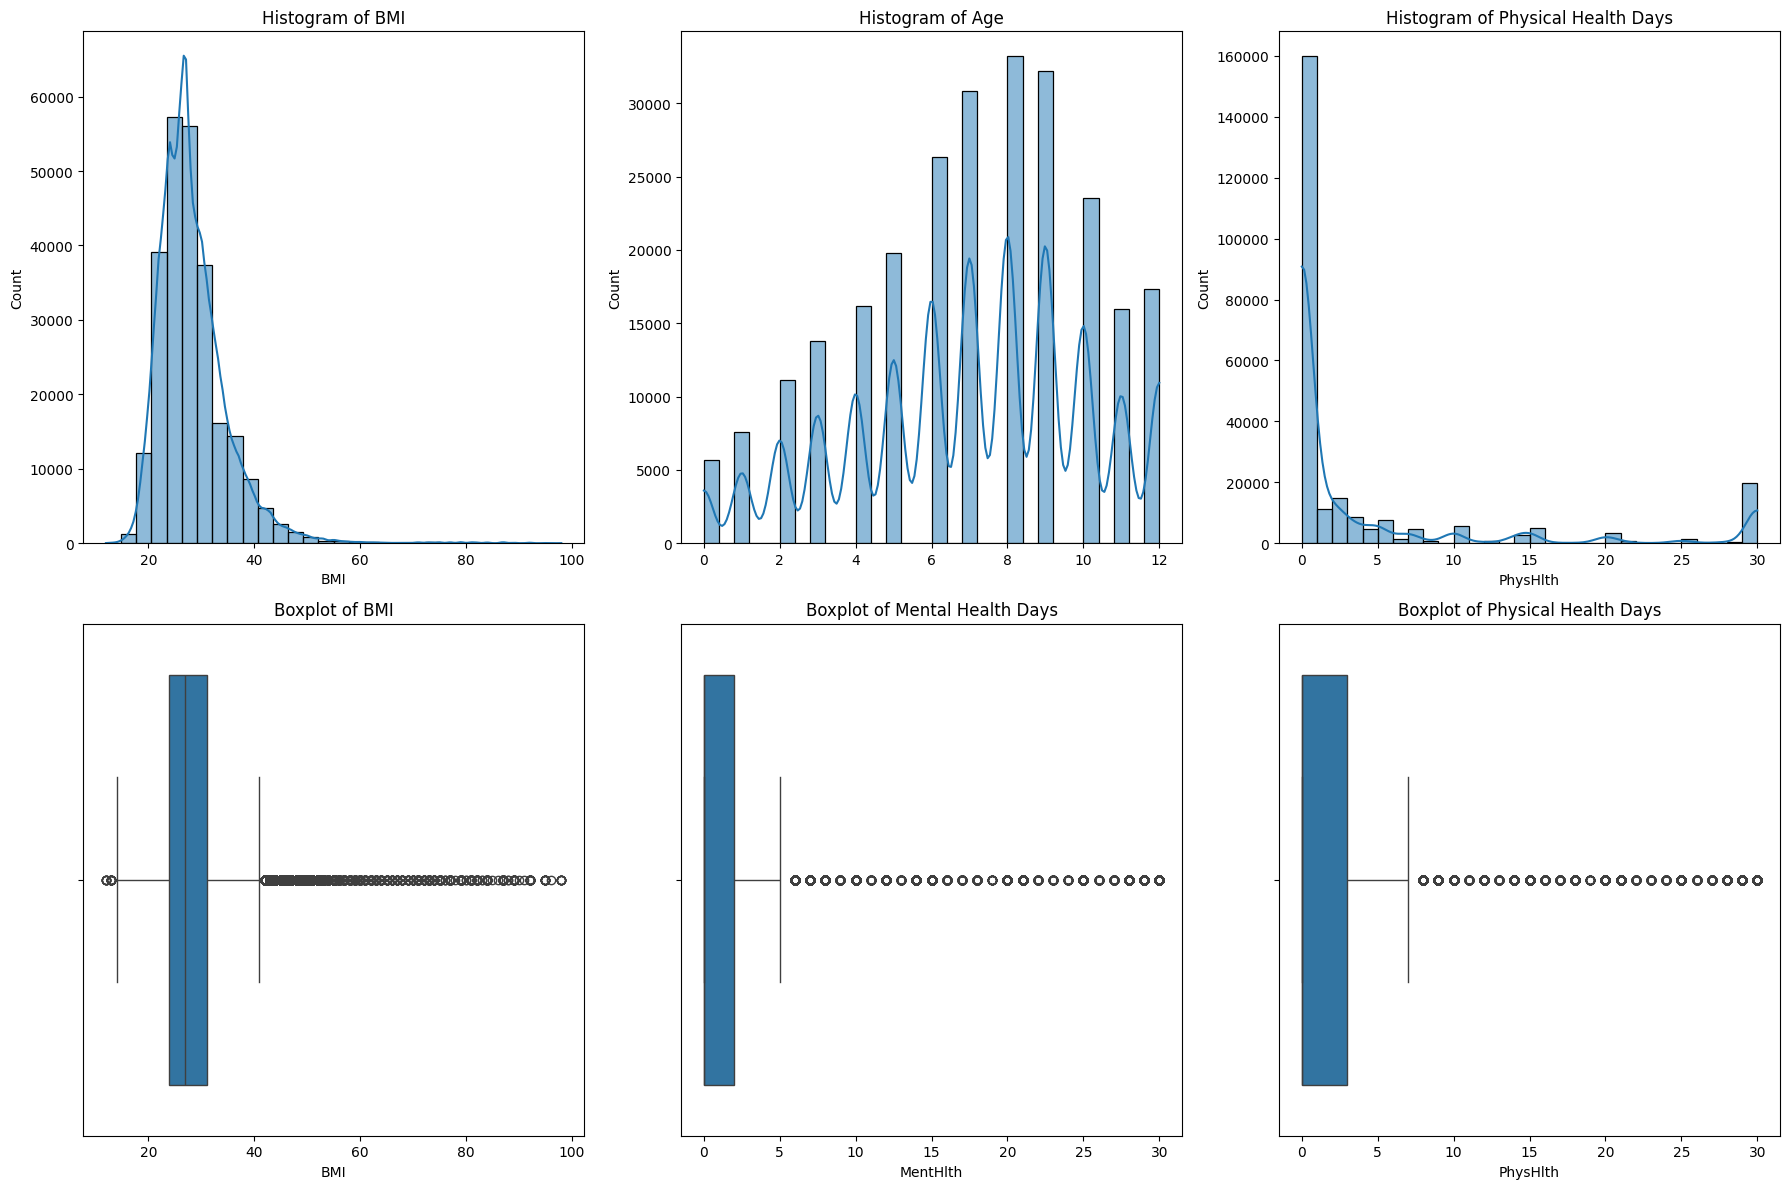

In [ ]:
# Univariate Analysis: Histograms and Boxplots
# Histograms show distributions of continuous variables
# Boxplots highlight outliers and spread of variables

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
sns.histplot(df_eda['BMI'], bins=30, kde=True, ax=axes[0, 0]).set_title("Histogram of BMI")
sns.histplot(df_eda['Age'].cat.codes, bins=30, kde=True, ax=axes[0, 1]).set_title("Histogram of Age")
sns.histplot(df_eda['PhysHlth'], bins=30, kde=True, ax=axes[0, 2]).set_title("Histogram of Physical Health Days")

sns.boxplot(x=df_eda['BMI'], ax=axes[1, 0]).set_title("Boxplot of BMI")
sns.boxplot(x=df_eda['MentHlth'], ax=axes[1, 1]).set_title("Boxplot of Mental Health Days")
sns.boxplot(x=df_eda['PhysHlth'], ax=axes[1, 2]).set_title("Boxplot of Physical Health Days")

plt.tight_layout()
plt.show()

# Key Findings:
# BMI is right-skewed with many individuals in the overweight/obese range
# Physical Health Days shows a large number of outliers at 30 days (chronic illness)
# Age distribution suggests more older individuals than younger ones in the dataset

#### Count Plots (Categorical Variables)

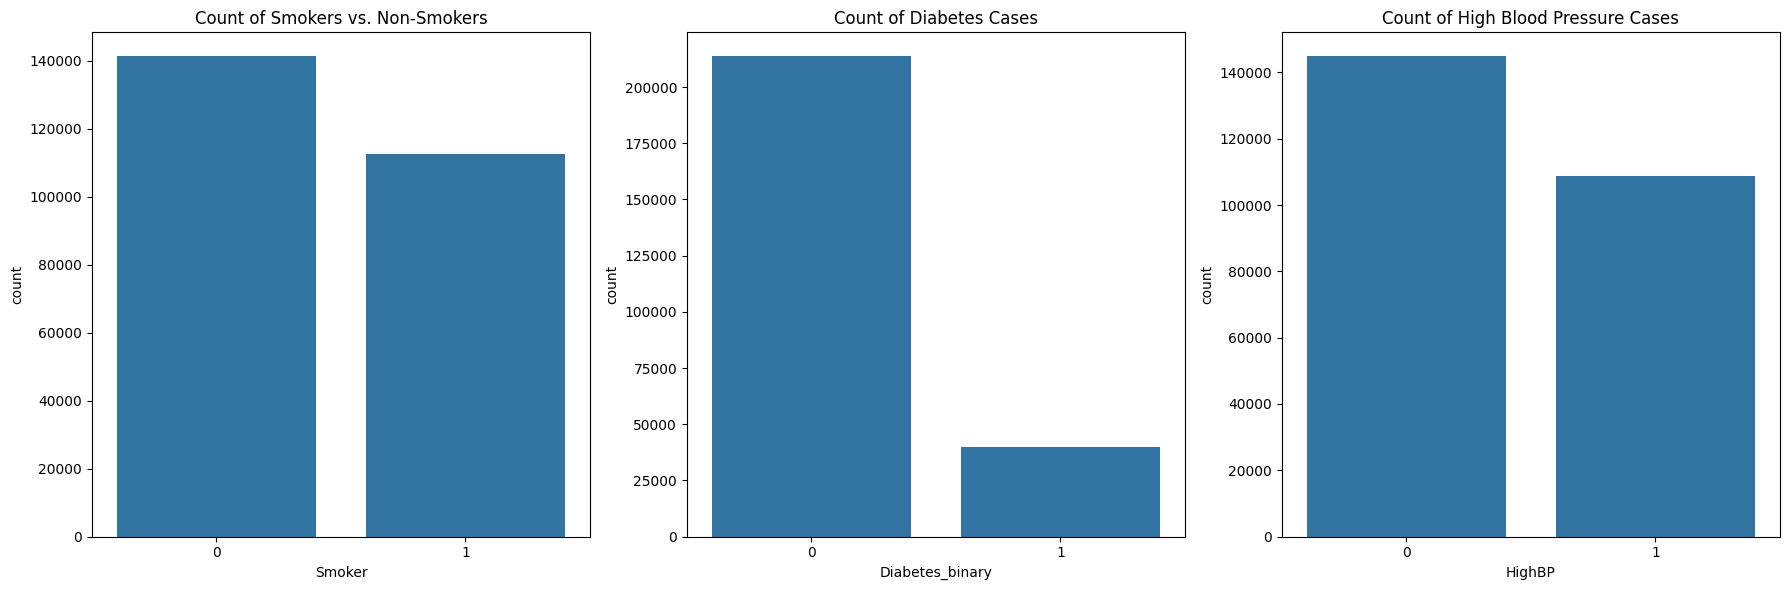

In [ ]:
# Count Plots for Categorical Variables
# Count plots show the distribution of categorical variables.
# This helps identify imbalances** (e.g., more smokers vs. non-smokers).

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.countplot(x=df_eda['Smoker'], ax=axes[0]).set_title("Count of Smokers vs. Non-Smokers")
sns.countplot(x=df_eda['Diabetes_binary'], ax=axes[1]).set_title("Count of Diabetes Cases")
sns.countplot(x=df_eda['HighBP'], ax=axes[2]).set_title("Count of High Blood Pressure Cases")

plt.tight_layout()
plt.show()

# Key Findings:
# Smoking: More non-smokers than smokers.
# Diabetes: Fewer individuals have diabetes (1s) than those without (0s), suggesting an imbalance in the target variable.
# High Blood Pressure (Hypertension): A significant number of individuals have high blood pressure (1s), which could be a risk factor for diabetes.

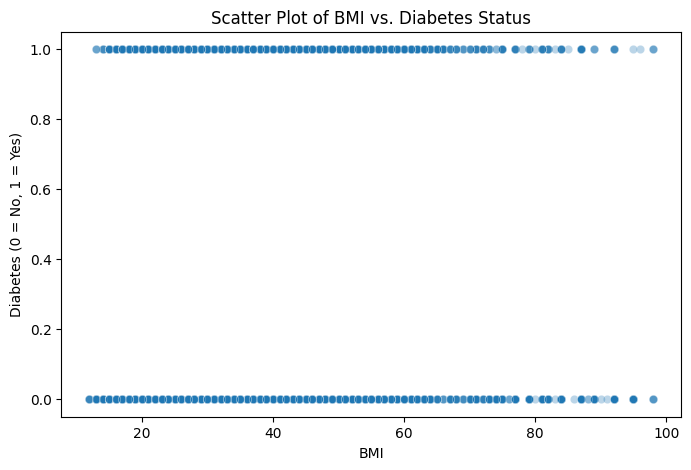

In [ ]:
# Bivariate Analysis: Scatter Plots to check relationships between variables
# These plots help determine if two variables have any relationship.
# Scatter plot: BMI vs. Diabetes Status

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_eda['BMI'], y=df_eda['Diabetes_binary'], alpha=0.3)
plt.xlabel("BMI")
plt.ylabel("Diabetes (0 = No, 1 = Yes)")
plt.title("Scatter Plot of BMI vs. Diabetes Status")
plt.show()

# Key Findings:
# No strong trend is visible
# Higher BMI values appear in both diabetic and non-diabetic groups, suggesting BMI alone is not a perfect predictor of diabetes

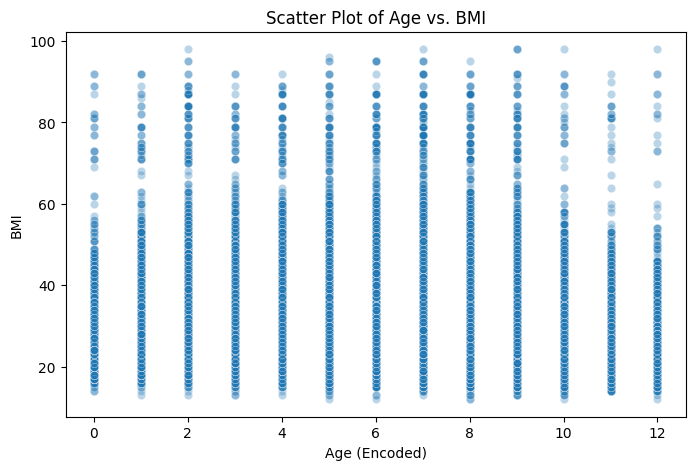

In [ ]:
# Scatter plot: Age vs. BMI
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_eda['Age'].cat.codes, y=df_eda['BMI'], alpha=0.3)
plt.xlabel("Age (Encoded)")
plt.ylabel("BMI")
plt.title("Scatter Plot of Age vs. BMI")
plt.show()

# Key Findings:
# BMI is widely distributed across all age groups.
# There is no strong correlation between age and BMI.

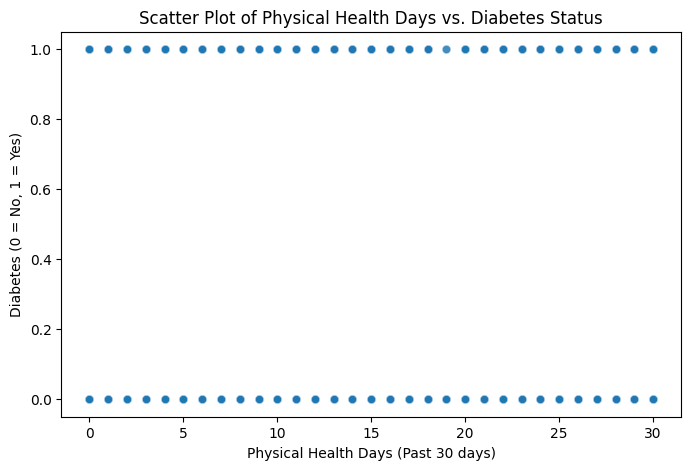

In [ ]:
# Scatter plot: Physical Health Days vs. Diabetes Status
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_eda['PhysHlth'], y=df_eda['Diabetes_binary'], alpha=0.3)
plt.xlabel("Physical Health Days (Past 30 days)")
plt.ylabel("Diabetes (0 = No, 1 = Yes)")
plt.title("Scatter Plot of Physical Health Days vs. Diabetes Status")
plt.show()

#Key findings:
# A noticeable subset of individuals reporting 30 days of poor physical health appear in both diabetic and non-diabetic groups, suggesting chronic physical health issues are not exclusive to diabetes patients.
# Many individuals with diabetes reported 0 poor physical health days, indicating that diabetes does not always correlate with reported physical health distress.
# No clear trend is visible between physical health days and diabetes, implying that other factors such as: BMI, age, blood pressure, may play a more significant role in diabetes risk

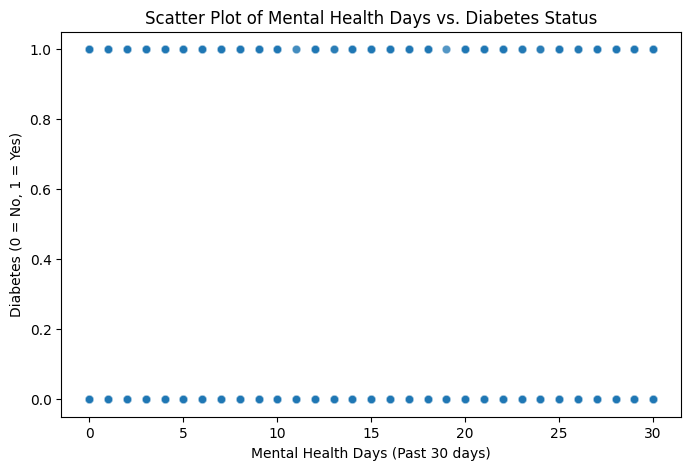

In [ ]:
# Scatter plot: Mental Health Days vs. Diabetes Status
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_eda['MentHlth'], y=df_eda['Diabetes_binary'], alpha=0.3)
plt.xlabel("Mental Health Days (Past 30 days)")
plt.ylabel("Diabetes (0 = No, 1 = Yes)")
plt.title("Scatter Plot of Mental Health Days vs. Diabetes Status")
plt.show()

#Key Findings:
# A subset of individuals reporting 30 days of poor mental health appear in both diabetic and non diabetic groups, suggesting that chronic mental distress is not exclusive to diabetes patients.
# Many individuals with diabetes reported 0 poor mental health days, indicating that mental health issues are not necessarily linked to diabetes.
# No clear trend is visible between mental health days and diabetes, implying that other factors such as: BMI, physical health, blood pressure, may play a more significant role in diabetes risk.

In [ ]:
# Display the statistical summary to analyze numerical data
# Statistical summary
from IPython.display import display
display(stat_summary)

#Print outlier information to identify extreme values
print("Outlier Counts:", outlier_info)

,count,mean,std,min,25%,50%,75%,max,Skewness
Diabetes_binary,253680.0,0.157588,0.364355,0.0,0.0,0.0,0.0,1.0,1.879563
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0,0.286904
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0,0.307075
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0,-4.881271
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0,2.122004
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0,0.228810
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0,4.657340
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0,2.778742
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0,-1.195546
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0,-0.557500


Outlier Counts: {'BMI': 9847, 'MentHlth': 36208, 'PhysHlth': 40949}


### Multivariate Analysis

#### Correlation Heatmap

In [ ]:
correlation_matrix = df.corr()

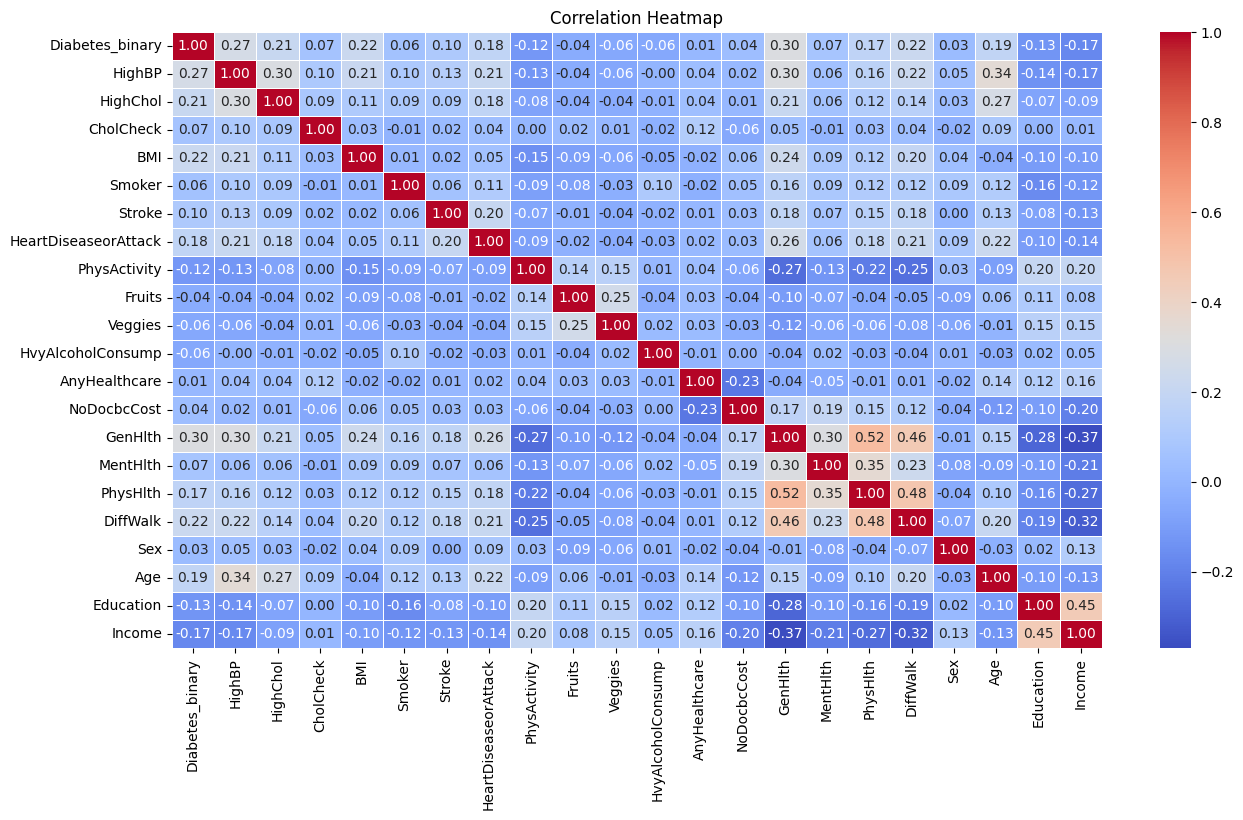

In [ ]:
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

Key Findings:
* Multifactorial Nature of Diabetes: The Diabetes_binary variable does not strongly correlate with any single predictor (|r| < 0.2 for most), suggesting diabetes risk results from multiple risk factors acting jointly rather than one dominant factor.
* Absence of Strong Collinearity: Most features fall in the −0.2 to 0.2 correlation range with each other. This low collinearity is promising for model stability—no single pair of features is redundant, and we likely retain valuable information by including multiple predictors.
* Moderate Correlations: A few variable pairs stand out (correlation ≈ 0.5). For instance:
-- DiffWalk vs. PhysHlth: Participants with serious difficulty walking also tend to report more days of poor physical health.
-- GenHlth vs. PhysHlth: Deteriorating physical health is strongly associated with poorer self-rated general health.
-- GenHlth vs. DiffWalk: Lower general health ratings align with walking difficulties, reinforcing how functional limitations and self-perceived health often co-occur.






### Target-Based Analysis


#### Health Indicators and Diabetes

##### BMI and Diabetes Risk

In [ ]:
bmi_df = df.copy()

In [ ]:
bmi_df['BMI_Category'] = bmi_df['BMI'].apply(lambda x: 'Underweight' if x < 18.5 else ('Normal' if x < 25 else ('Overweight' if x < 30 else 'Obese')))

<ipython-input-30-8811e8b5fe1f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


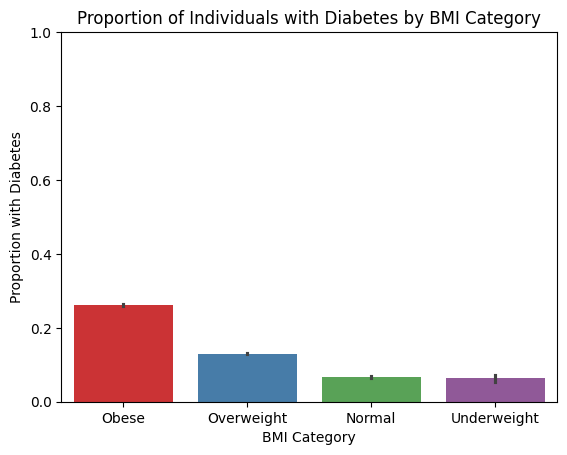

In [ ]:
plt.figure()
sns.barplot(
    data=bmi_df,
    x='BMI_Category',
    y='Diabetes_binary',
    estimator=lambda x: x.mean(),
    errorbar=('ci', 95),
    palette='Set1')

plt.title('Proportion of Individuals with Diabetes by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Proportion with Diabetes')
plt.ylim(0, 1)
plt.show()

<ipython-input-31-489247884fa7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Diabetes_binary', y='BMI', data=df, palette='Set1')


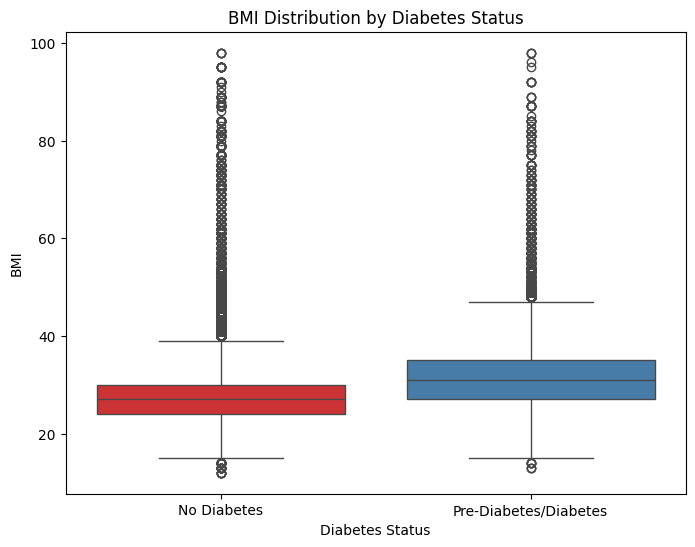

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Diabetes_binary', y='BMI', data=df, palette='Set1')
plt.title('BMI Distribution by Diabetes Status')
plt.xlabel('Diabetes Status')
plt.xticks([0, 1], ['No Diabetes', 'Pre-Diabetes/Diabetes'])
plt.ylabel('BMI')
plt.show()

In [ ]:
# Conducting hypothesis test to determine if the differences of average BMI between 2 groups
# are statistically significant
print("H0: μBMI_No_Diabetes = μBMI_Diabetes | Ha: μBMI_No_Diabetes =/= μBMI_Diabetes")
diabetes_group = df[df['Diabetes_binary'] == 1]['BMI']
no_diabetes_group = df[df['Diabetes_binary'] == 0]['BMI']

# Descriptive Statistics
bmi_mean_diabetes = diabetes_group.mean()
bmi_mean_no_diabetes = no_diabetes_group.mean()
print(f"μBMI_No_Diabetes = {bmi_mean_no_diabetes:.2f}")
print(f"μBMI_Diabetes = {bmi_mean_diabetes:.2f}")

# T critical value:
deg_of_freedom = len(diabetes_group) + len(no_diabetes_group) - 2
t_critical = t.ppf(1 - 0.05, deg_of_freedom)

print(f"Degree of Freedom: {deg_of_freedom} | alpha = 0.05 ")
print(f"T-Critical Value: {t_critical}")

# Perform a two-sample t-test (assuming unequal variances)
t_stat, p_value = ttest_ind(diabetes_group, no_diabetes_group, equal_var=False)
print(f"T-test: t={t_stat:.2f}, p={p_value:.3f}")
# Interpretation

if p_value < 0.05:
    print("Conclusion: Reject null hypothesis. There is sufficient evidence to conclude that the the average BMI of people without diabetes is different than people with diabetes.")
else:
    print("Conclusion: Do not reject null hypothesis.There is not sufficient evidence to conclude that the the average BMI of people without diabetes is different than people with diabetes.")

H0: μBMI_No_Diabetes = μBMI_Diabetes | Ha: μBMI_No_Diabetes =/= μBMI_Diabetes
μBMI_No_Diabetes = 27.74
μBMI_Diabetes = 31.80
Degree of Freedom: 253678 | alpha = 0.05 
T-Critical Value: 1.6448596336794739
T-test: t=103.91, p=0.000
Conclusion: Reject null hypothesis. There is sufficient evidence to conclude that the the average BMI of people without diabetes is different than people with diabetes.


* Statistically Significant Difference: The two-sample t-test (p < 0.05) shows that individuals with diabetes have a higher mean BMI (31.80) than those without (27.74).
* Clinical & Practical Implications: Obesity remains a key modifiable risk factor. As BMI climbs above 25 (Overweight) and above 30 (Obese), the prevalence of diabetes rises sharply.

##### Blood Pressure

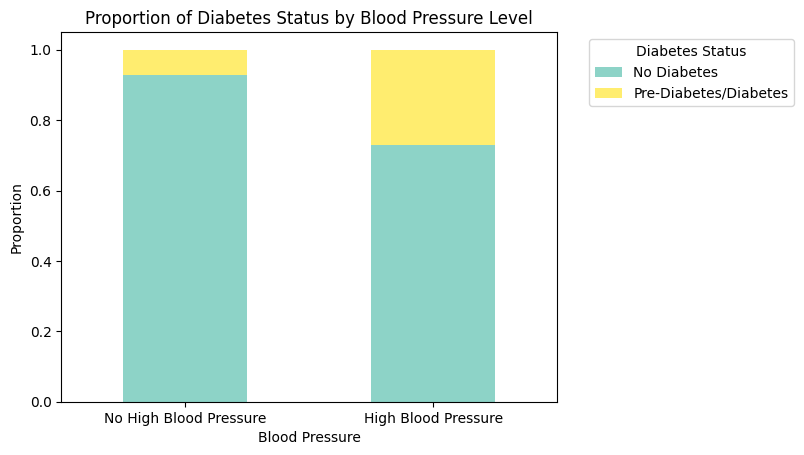

In [ ]:
bp_diabetes_ct = pd.crosstab(df['HighBP'], df['Diabetes_binary'])
bp_prop_table = bp_diabetes_ct.div(bp_diabetes_ct.sum(axis=1), axis=0)
bp_prop_table.plot(kind='bar', stacked=True, colormap='Set3')
plt.title('Proportion of Diabetes Status by Blood Pressure Level')
plt.xlabel('Blood Pressure')
plt.ylabel('Proportion')
plt.xticks([0, 1], ['No High Blood Pressure', 'High Blood Pressure'], rotation=0)
plt.legend(title='Diabetes Status', labels=['No Diabetes','Pre-Diabetes/Diabetes'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

##### Roughly 25% of people with high blood pressure also have diabetes or prediabetes. Given the well-documented synergy between hypertension and insulin resistance, this is an important cluster to monitor.





##### Cholesterol

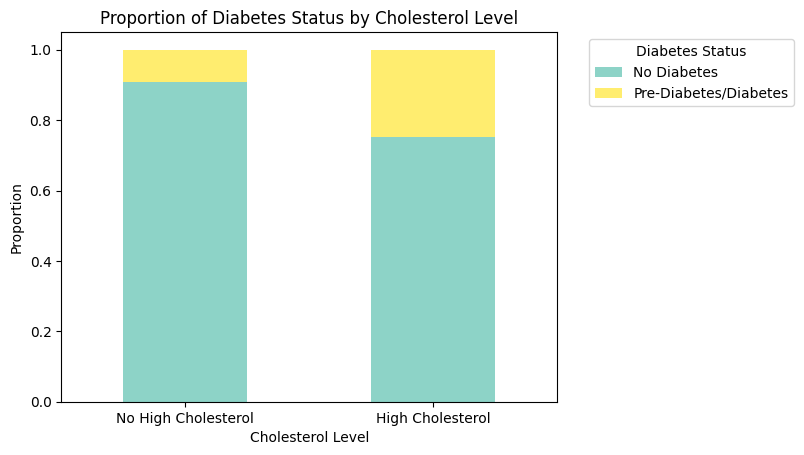

In [ ]:
chol_diabetes_ct = pd.crosstab(df['HighChol'], df['Diabetes_binary'])
chol_prop_table = chol_diabetes_ct.div(chol_diabetes_ct.sum(axis=1), axis=0)
chol_prop_table.plot(kind='bar', stacked=True, colormap='Set3')
plt.title('Proportion of Diabetes Status by Cholesterol Level')
plt.xlabel('Cholesterol Level')
plt.ylabel('Proportion')
plt.xticks([0, 1], ['No High Cholesterol', 'High Cholesterol'], rotation=0)
plt.legend(title='Diabetes Status', labels=['No Diabetes','Pre-Diabetes/Diabetes'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
chol_df = df.copy()
chol_df['Cholesterol Factor'] = chol_df.apply(lambda row: 'High Chol & Checked' if row['HighChol'] == 1 and row['CholCheck'] == 1
                                      else ('High Chol but Not Check' if row['HighChol'] == 1 else
                                       ('No High Chol but Checked' if row['CholCheck'] == 1 else 'No High Chol & Not Check')), axis=1)


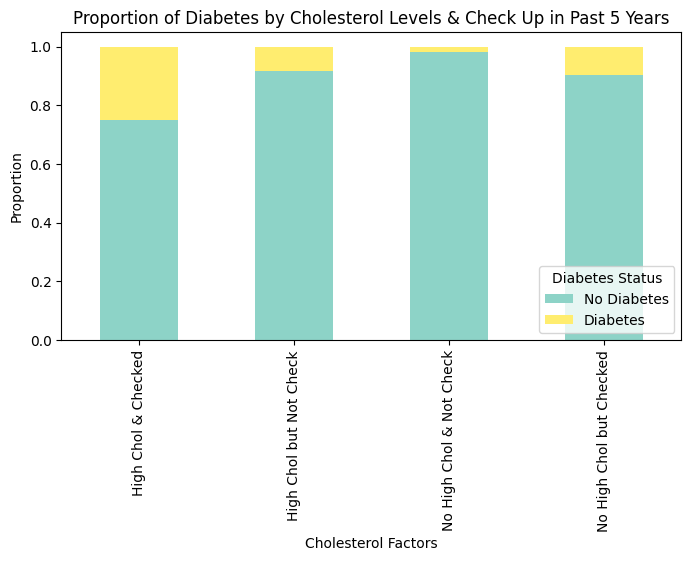

In [ ]:
chol_ct = pd.crosstab(chol_df['Cholesterol Factor'], chol_df['Diabetes_binary'])

chol_prop_ct = chol_ct.div(chol_ct.sum(axis=1), axis=0)

chol_prop_ct.plot(kind='bar', stacked=True, figsize=(8,4), colormap='Set3')
plt.title('Proportion of Diabetes by Cholesterol Levels & Check Up in Past 5 Years')
plt.xlabel('Cholesterol Factors')
plt.ylabel('Proportion')
plt.legend(title='Diabetes Status', labels=['No Diabetes', 'Diabetes'], loc='lower right')
plt.show()

Among those with high cholesterol who had it checked, ~25% have diabetes. Interestingly, even among those who don’t have high cholesterol and do not check it, ~10% are diabetic—implying lack of screening does not preclude risk.

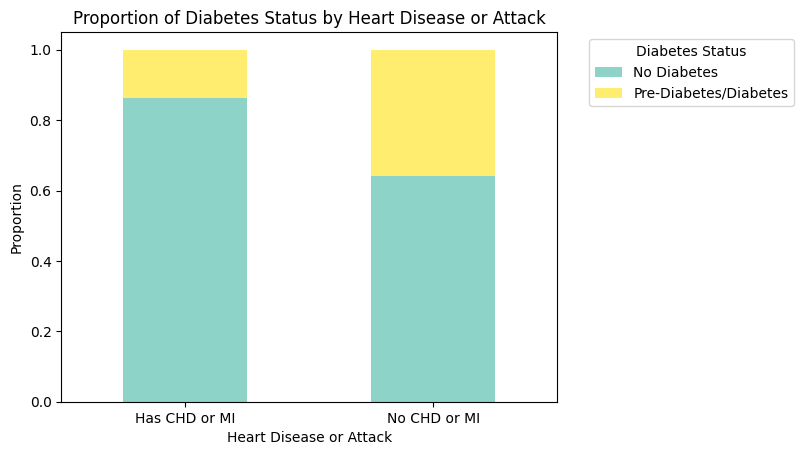

In [ ]:
heartdisease_diabetes_ct = pd.crosstab(df['HeartDiseaseorAttack'], df['Diabetes_binary'])
heart_prop_table = heartdisease_diabetes_ct.div(heartdisease_diabetes_ct.sum(axis=1), axis=0)
heart_prop_table.plot(kind='bar', stacked=True, colormap='Set3')
plt.title('Proportion of Diabetes Status by Heart Disease or Attack')
plt.xlabel('Heart Disease or Attack')
plt.ylabel('Proportion')
plt.xticks([0,1],['Has CHD or MI', 'No CHD or MI'], rotation=0)
plt.legend(title='Diabetes Status', labels=['No Diabetes','Pre-Diabetes/Diabetes'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

About 30% of participants without heart disease still have pre/diabetes. Although heart disease and diabetes often co-occur, the large fraction without heart disease suggests diabetes frequently presents without overt cardiovascular events—highlighting the importance of proactive screening.

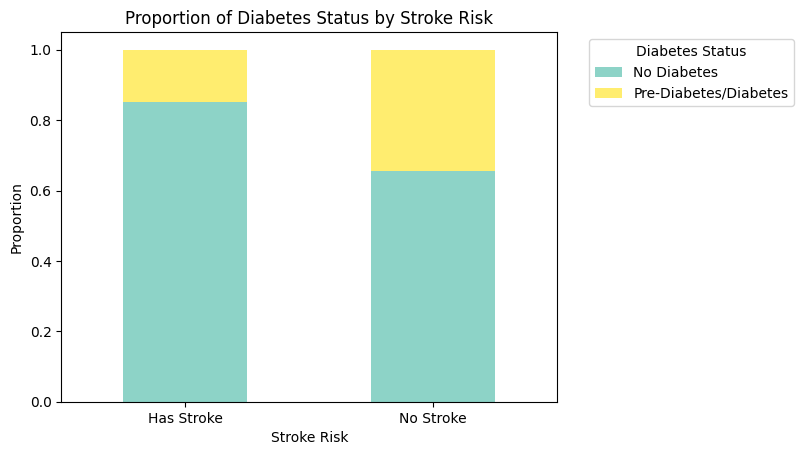

In [ ]:
stroke_diabetes_ct = pd.crosstab(df['Stroke'], df['Diabetes_binary'])
stroke_prop_table = stroke_diabetes_ct.div(stroke_diabetes_ct.sum(axis=1), axis=0)
stroke_prop_table.plot(kind='bar', stacked=True, colormap='Set3')
plt.title('Proportion of Diabetes Status by Stroke Risk')
plt.xlabel('Stroke Risk')
plt.ylabel('Proportion')
plt.xticks([0,1],['Has Stroke', 'No Stroke'], rotation=0)
plt.legend(title='Diabetes Status', labels=['No Diabetes','Pre-Diabetes/Diabetes'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

About 30% of people who do not have Stroke have prediabetes/diabetes. Stroke is often a downstream consequence of long-term uncontrolled diabetes and other cardiovascular issues. The fact that a significant portion of people without stroke still exhibit prediabetes/diabetes suggests that diabetes can be present well before severe complications like stroke develop. This supports the importance of early detection and intervention.




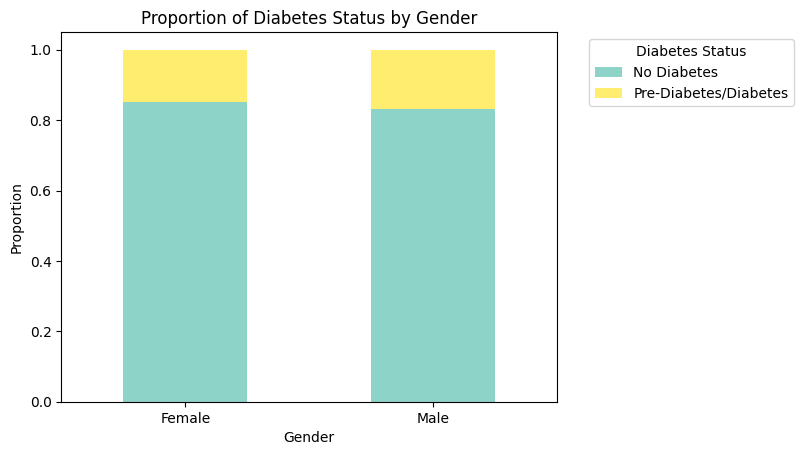

In [ ]:
gender_diabetes_ct = pd.crosstab(df['Sex'], df['Diabetes_binary'])
gender_prop_table = gender_diabetes_ct.div(gender_diabetes_ct.sum(axis=1), axis=0)
gender_prop_table.plot(kind='bar', stacked=True, colormap='Set3')
plt.title('Proportion of Diabetes Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Proportion')
plt.xticks([0,1],['Female', 'Male'], rotation=0)
plt.legend(title='Diabetes Status', labels=['No Diabetes','Pre-Diabetes/Diabetes'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

##### Males and females show similar ~18% prevalence of pre/diabetes. This parity suggests that gender alone is not a strong differentiator; future analysis might look at whether lifestyle factors differ by gender.

#### Social Determinants of Health and Diabetes

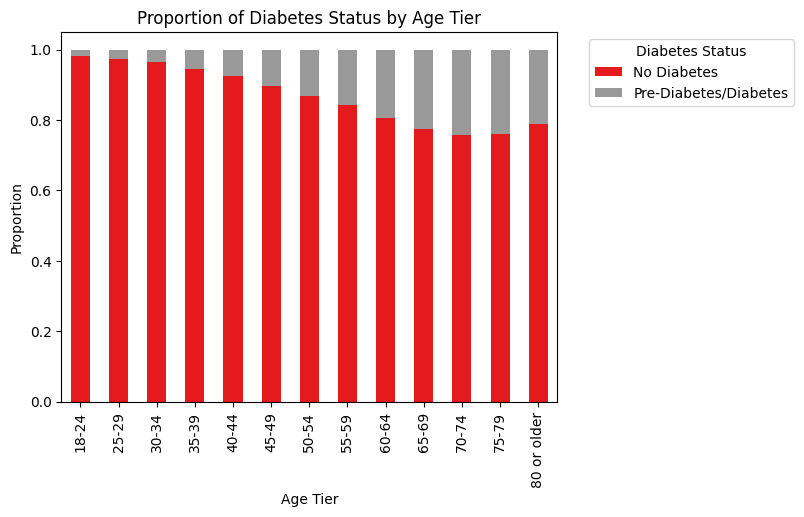

In [ ]:
age_diabetes_ct = pd.crosstab(df['Age'], df['Diabetes_binary'])
age_prop_table = age_diabetes_ct.div(age_diabetes_ct.sum(axis=1), axis=0)
age_tiers = {1: '18-24', 2: '25-29', 3: '30-34', 4: '35-39', 5: '40-44', 6: '45-49', 7: '50-54', 8: '55-59', 9: '60-64', 10: '65-69',
11: '70-74', 12: '75-79', 13: '80 or older'}
age_prop_table.plot(kind='bar', stacked=True, colormap='Set1')
plt.title('Proportion of Diabetes Status by Age Tier')
plt.xlabel('Age Tier')
plt.ylabel('Proportion')
plt.xticks(range(len(age_tiers)), list(age_tiers.values()))
plt.legend(title='Diabetes Status', labels=['No Diabetes','Pre-Diabetes/Diabetes'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

As age tier increases—particularly past 55—the incidence of pre/diabetes rises substantially. This age effect is consistent with other studies, supporting age-based screening approaches.

<Figure size 1500x800 with 0 Axes>

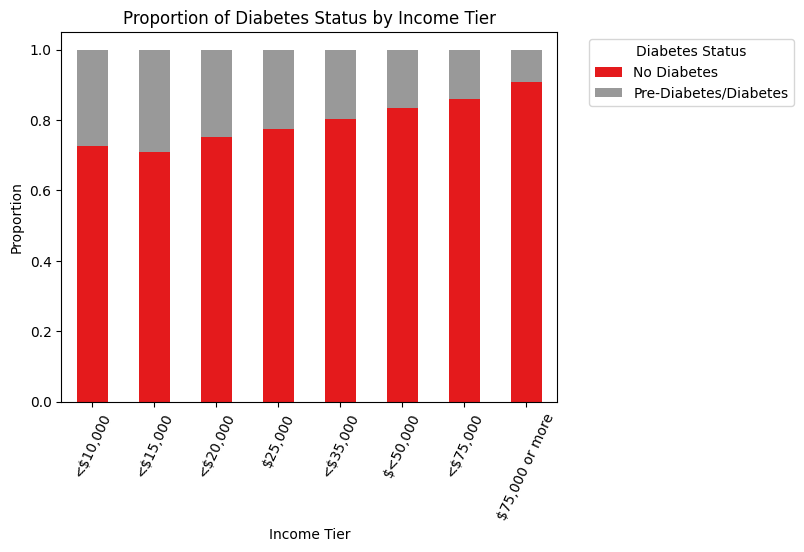

In [ ]:
income_diabetes_ct = pd.crosstab(df['Income'], df['Diabetes_binary'])
income_prop_table = income_diabetes_ct.div(income_diabetes_ct.sum(axis=1), axis=0)
income_tiers = {1.0: '<$10,000', 2.0:'<$15,000',
3.0: '<$20,000', 4.0: '$25,000',
5.0: '<$35,000', 6.0: '$<50,000',
7.0: '<$75,000', 8.0: '$75,000 or more'}
plt.figure(figsize=(15, 8))
income_prop_table.plot(kind='bar', stacked=True, colormap='Set1')
plt.title('Proportion of Diabetes Status by Income Tier')
plt.xlabel('Income Tier')
plt.ylabel('Proportion')
plt.xticks(range(len(income_tiers)), list(income_tiers.values()), rotation=65)
plt.legend(title='Diabetes Status', labels=['No Diabetes','Pre-Diabetes/Diabetes'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Lower income brackets (especially $10,000–$35,000) show higher diabetes prevalence. Financial barriers might limit access to healthy food, medical care, or consistent follow-ups.

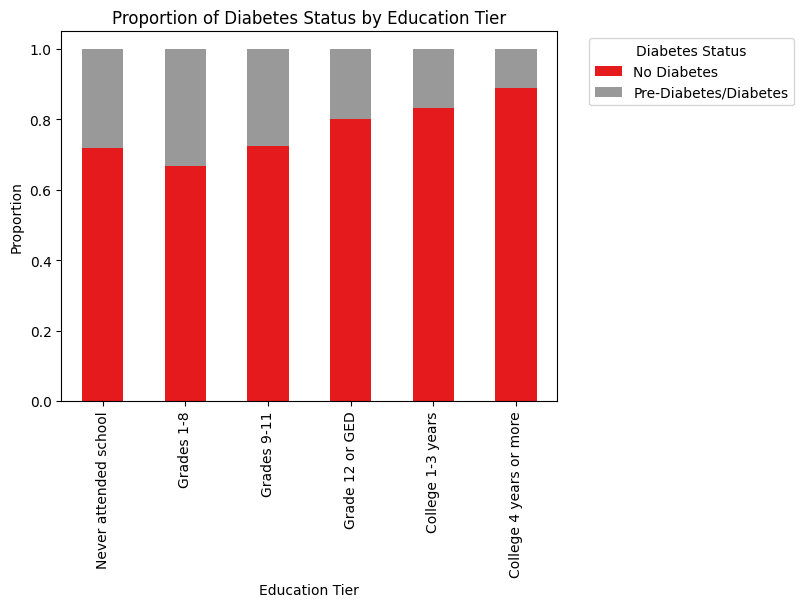

In [ ]:
education_diabetes_ct = pd.crosstab(df['Education'], df['Diabetes_binary'])
prop_table = education_diabetes_ct.div(education_diabetes_ct.sum(axis=1), axis=0)
education_tiers = {1.0: 'Never attended school', 2.0:'Grades 1-8',
3.0: 'Grades 9-11', 4.0: 'Grade 12 or GED',
5.0: 'College 1-3 years', 6.0: 'College 4 years or more'
}
prop_table.plot(kind='bar', stacked=True, colormap='Set1')
plt.title('Proportion of Diabetes Status by Education Tier')
plt.xlabel('Education Tier')
plt.ylabel('Proportion')
plt.xticks(range(len(education_tiers)), list(education_tiers.values()))
plt.legend(title='Diabetes Status', labels=['No Diabetes','Pre-Diabetes/Diabetes'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

More prediabetes/diabetes cases are found in people in lower Education Tiers, especially for those who never attended school leading up to Grade 11.

In [ ]:
chi2, p, dof, expected = chi2_contingency(education_diabetes_ct)
print("H0: Education & Diabetes Independent of Each Other | Ha: Education & Diabetes Dependent of Each Other")
print("Chi-square p-value:", p)

if p < 0.5:
    print("\nConclusion: p-value is less than 0.5.")
    print("There is sufficient evidence to reject the null hypothesis and conclude that there is a statistically significant association between Education and Diabetes status.")
else:
    print("\nConclusion: p-value is not less than 0.5.")
    print("There is insufficient evidence to reject the null hypothesis, suggesting that Education and Diabetes status may be independent in this dataset.")

H0: Education & Diabetes Independent of Each Other | Ha: Education & Diabetes Dependent of Each Other
Chi-square p-value: 0.0

Conclusion: p-value is less than 0.5.
There is sufficient evidence to reject the null hypothesis and conclude that there is a statistically significant association between Education and Diabetes status.


Participants with limited formal education (below Grade 11) have a notably higher diabetes prevalence, approaching 41% in some subsets. The chi-square test confirms a statistically significant relationship between education and diabetes. These findings align with research indicating health literacy and educational attainment affect diet, exercise, and healthcare usage.

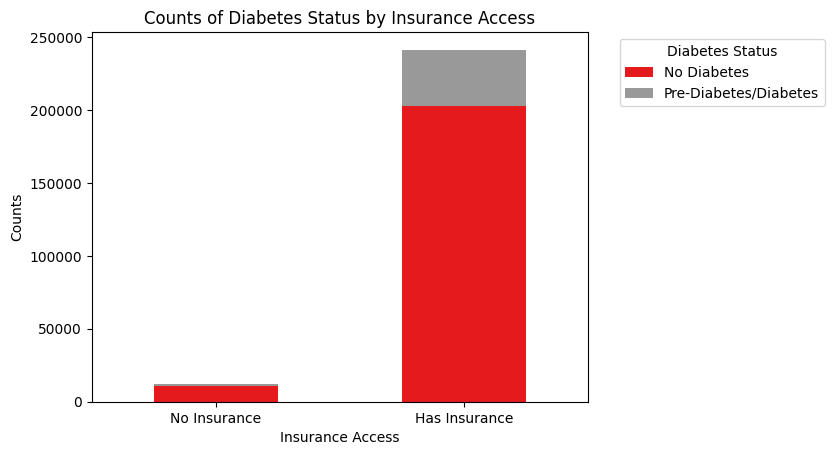

In [ ]:
insurance_diabetes_ct = pd.crosstab(df['AnyHealthcare'], df['Diabetes_binary'])
insurance_diabetes_ct.plot(kind='bar', stacked=True, colormap='Set1')
plt.title('Counts of Diabetes Status by Insurance Access')
plt.xlabel('Insurance Access')
plt.ylabel('Counts')
plt.xticks([0,1],['No Insurance', 'Has Insurance'], rotation=0)
plt.legend(title='Diabetes Status', labels=['No Diabetes','Pre-Diabetes/Diabetes'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
ins_prop_table = insurance_diabetes_ct.div(insurance_diabetes_ct.sum(axis=1), axis=0)
ins_prop_table

Diabetes_binary,0,1
AnyHealthcare,,
0,0.865024,0.134976
1,0.841248,0.158752


In [ ]:
chi2, p, dof, expected = chi2_contingency(insurance_diabetes_ct)
print("H0: Health Insurance & Diabetes Independent of Each Other | Ha: Health Insurance & Diabetes Dependent of Each Other")
print("Chi-square p-value:", p)

if p < 0.5:
    print("\nConclusion: p-value is less than 0.5.")
    print("There is sufficient evidence to reject the null hypothesis and conclude that there is a statistically significant association between Health Insurance and Diabetes status.")
else:
    print("\nConclusion: p-value is not less than 0.5.")
    print("There is insufficient evidence to reject the null hypothesis, suggesting that Health Insurance and Diabetes status may be independent in this dataset.")

H0: Health Insurance & Diabetes Independent of Each Other | Ha: Health Insurance & Diabetes Dependent of Each Other
Chi-square p-value: 1.456085516078702e-12

Conclusion: p-value is less than 0.5.
There is sufficient evidence to reject the null hypothesis and conclude that there is a statistically significant association between Health Insurance and Diabetes status.


People with and without insurance both show notable diabetes prevalence (~16% and 13%, respectively), but the chi-square analysis suggests access to insurance is significantly associated with diabetes status.

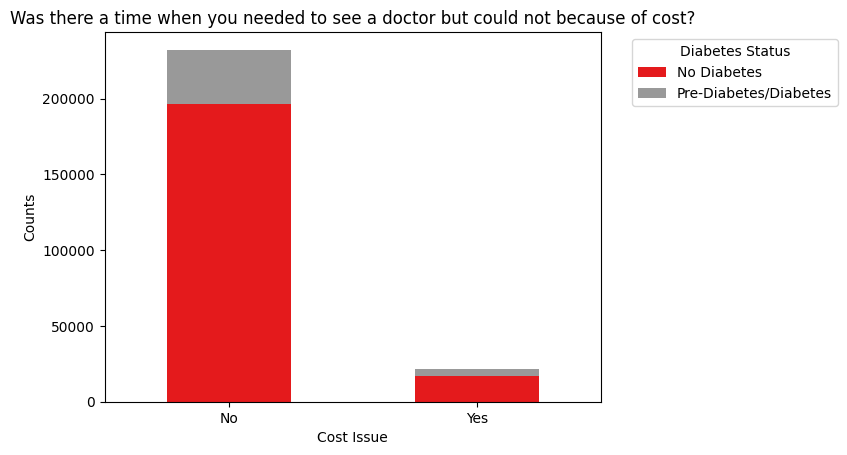

In [ ]:
cost_diabetes_ct = pd.crosstab(df['NoDocbcCost'], df['Diabetes_binary'])
cost_diabetes_ct.plot(kind='bar', stacked=True, colormap='Set1')
plt.title('Was there a time when you needed to see a doctor but could not because of cost?')
plt.xlabel('Cost Issue')
plt.ylabel('Counts')
plt.xticks([0,1],['No', 'Yes'], rotation=0)
plt.legend(title='Diabetes Status', labels=['No Diabetes','Pre-Diabetes/Diabetes'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
cost_prop_table = cost_diabetes_ct.div(cost_diabetes_ct.sum(axis=1), axis=0)
cost_prop_table

Diabetes_binary,0,1
NoDocbcCost,,
0,0.846612,0.153388
1,0.796713,0.203287


Among those who avoided doctor visits due to cost, 20% have diabetes—higher than the 15% for those without cost barriers. Financial constraints are thus a critical factor, potentially leading to delayed diagnoses or suboptimal management.


<ipython-input-49-f010c02584e3>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = pd.pivot_table(df, values='Diabetes_binary',


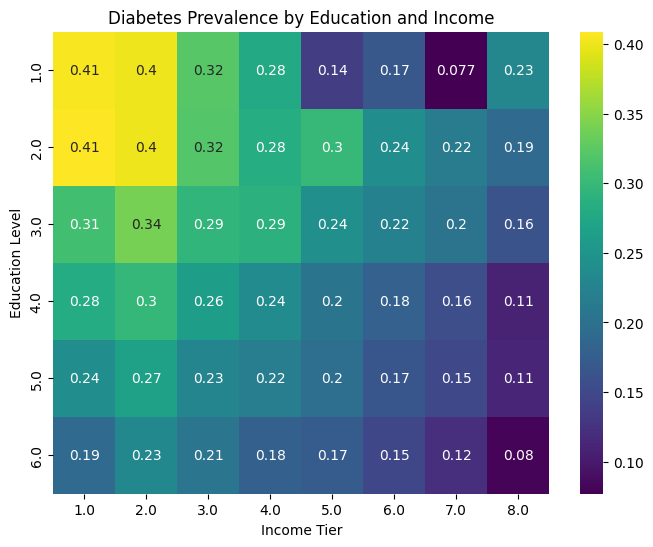

In [ ]:
pivot = pd.pivot_table(df, values='Diabetes_binary',
                       index='Education', columns='Income', aggfunc='mean')

plt.figure(figsize=(8,6))
sns.heatmap(pivot, annot=True, cmap='viridis')
plt.title('Diabetes Prevalence by Education and Income')
plt.xlabel('Income Tier')
plt.ylabel('Education Level')
plt.show()

Diabetes prevalance are most likely high for those who are in lower tiers of education and income levels, with those who earns less than 25,000 annually and finished Grade 8 and below have up to 41% of diabetes cases. Lower income and lower education levels often limit access to resources such as quality healthcare, nutritious foods, and safe environments for physical activity. These limitations can contribute to higher stress levels and poorer lifestyle choices, all of which increase the risk for developing diabetes.

#### Lifestyle Indicators

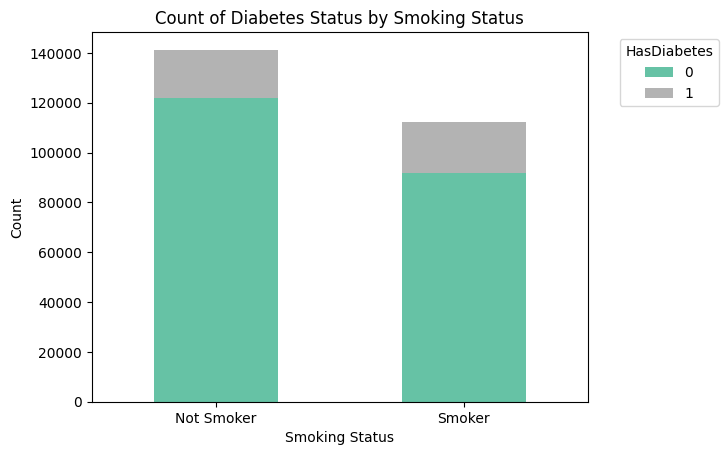

In [ ]:
smoke_diabetes_ct = pd.crosstab(df['Smoker'], df['Diabetes_binary'])
#prop_table = smoke_diabetes_ct.div(smoke_diabetes_ct.sum(axis=1), axis=0)
smoke_diabetes_ct.plot(kind='bar', stacked=True, colormap='Set2')
plt.title('Count of Diabetes Status by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Smoker', 'Smoker'], rotation=0)
plt.legend(title='HasDiabetes', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
prop_table

Diabetes_binary,0,1
Smoker,,
0,0.862817,0.137183
1,0.816772,0.183228


Smokers (18% diabetes) vs. non-smokers (13% diabetes). This difference points to tobacco use as a potential contributor, aligning with evidence that smoking exacerbates insulin resistance and cardiovascular risk.

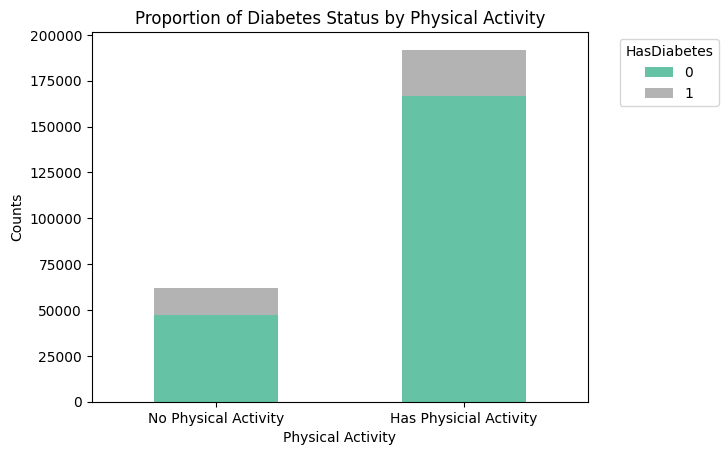

In [ ]:
exercise_diabetes_ct = pd.crosstab(df['PhysActivity'], df['Diabetes_binary'])
exercise_prop_table = exercise_diabetes_ct.div(exercise_diabetes_ct.sum(axis=1), axis=0)
exercise_diabetes_ct.plot(kind='bar', stacked=True, colormap='Set2')
plt.title('Proportion of Diabetes Status by Physical Activity')
plt.xlabel('Physical Activity')
plt.ylabel('Counts')
plt.xticks([0, 1], ['No Physical Activity', 'Has Physicial Activity'], rotation=0)
plt.legend(title='HasDiabetes', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
exercise_prop_table

Diabetes_binary,0,1
PhysActivity,,
0,0.764443,0.235557
1,0.867502,0.132498


Sedentary individuals (23% diabetes) vs. active individuals (13%). The 10% gap underscores exercise as a critical preventive measure. Physical activity is a cornerstone of diabetes management and prevention.

In [ ]:
food_df = df.copy()
food_df['Food_Group'] = food_df.apply(lambda row: 'Both' if row['Fruits'] == 1
                                      and row['Veggies'] == 1 else ('Fruits' if row['Fruits'] == 1 else
                                       ('Vegetables' if row['Veggies'] == 1 else 'Neither')), axis=1)

<ipython-input-54-1a1095fd1d30>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(


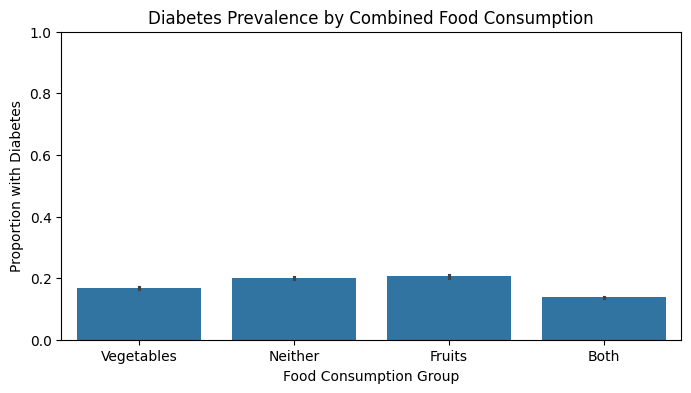

In [ ]:
plt.figure(figsize=(8,4))
sns.barplot(
    data=food_df,
    x='Food_Group',
    y='Diabetes_binary',
    estimator=np.mean,
    ci=95
)
plt.title('Diabetes Prevalence by Combined Food Consumption')
plt.xlabel('Food Consumption Group')
plt.ylabel('Proportion with Diabetes')
plt.ylim(0,1)
plt.show()

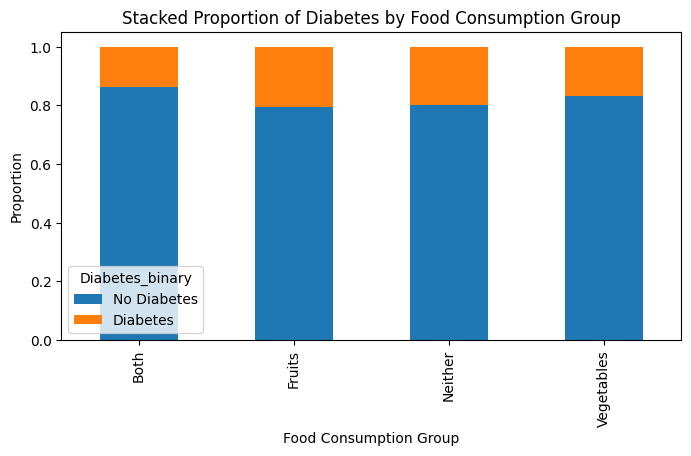

In [ ]:
ct = pd.crosstab(food_df['Food_Group'], food_df['Diabetes_binary'])

prop_ct = ct.div(ct.sum(axis=1), axis=0)

prop_ct.plot(kind='bar', stacked=True, figsize=(8,4))
plt.title('Stacked Proportion of Diabetes by Food Consumption Group')
plt.xlabel('Food Consumption Group')
plt.ylabel('Proportion')
plt.legend(title='Diabetes_binary', labels=['No Diabetes', 'Diabetes'])
plt.show()

In [ ]:
prop_ct

Diabetes_binary,0,1
Food_Group,,
Both,0.861623,0.138377
Fruits,0.794677,0.205323
Neither,0.799481,0.200519
Vegetables,0.832898,0.167102


People consuming both fruits and vegetables have the lowest diabetes prevalence (~14%), while those consuming only fruits or no produce at all hover around ~20%. A balanced diet with diverse fruits and vegetables appears protective, although the interplay with total calorie intake and other factors warrants further investigation.

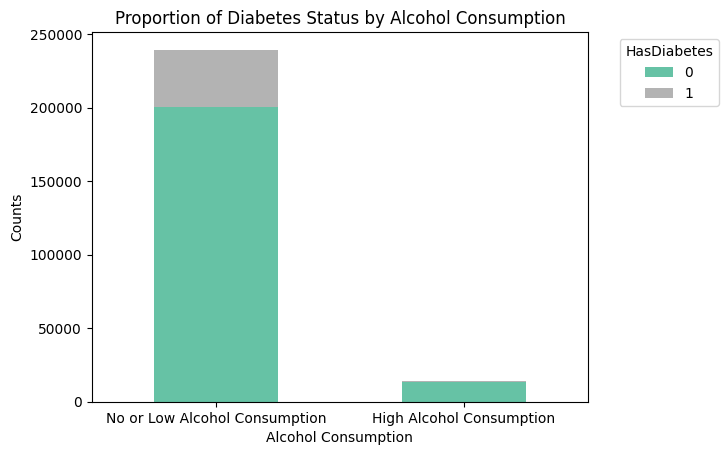

In [ ]:
alcohol_diabetes_ct = pd.crosstab(df['HvyAlcoholConsump'], df['Diabetes_binary'])
#prop_table = alcohol_diabetes_ct.div(alcohol_diabetes_ct.sum(axis=1), axis=0)
alcohol_diabetes_ct.plot(kind='bar', stacked=True, colormap='Set2')
plt.title('Proportion of Diabetes Status by Alcohol Consumption')
plt.xlabel('Alcohol Consumption')
plt.ylabel('Counts')
plt.xticks([0, 1], ['No or Low Alcohol Consumption', 'High Alcohol Consumption'], rotation=0)
plt.legend(title='HasDiabetes', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
prop_table

Diabetes_binary,0,1
Education,,
1.0,0.718391,0.281609
2.0,0.667574,0.332426
3.0,0.724625,0.275375
4.0,0.802135,0.197865
5.0,0.832828,0.167172
6.0,0.889392,0.110608


Data on heavy drinkers is limited, making it difficult to draw definitive conclusions. Nonetheless, existing literature often flags excessive alcohol intake as a risk factor for metabolic disorders.

## Predictive Modeling

Handle class imbalance using undersampling

In [ ]:
# Handle class imbalance using undersampling
df_major_undersampling = df[df['Diabetes_binary'] == 0]
df_minor_undersampling = df[df['Diabetes_binary'] == 1]

df_major_undersampling_downsampled = resample(df_major_undersampling,
                                   replace=False,
                                   n_samples=len(df_minor_undersampling),
                                   random_state=42)

df_balanced_undersampling = pd.concat([df_major_undersampling_downsampled, df_minor_undersampling]).sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
# Define features and target variable
y = df_balanced_undersampling['Diabetes_binary']
X = df_balanced_undersampling.drop(columns=['Diabetes_binary'])
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# After scaling
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train),
                              columns=X_train.columns,
                              index=X_train.index)

X_test_scaled = pd.DataFrame(scaler.transform(X_test),
                             columns=X_test.columns,
                             index=X_test.index)

# Define function to evaluate models
def evaluate_model(model, X_test, y_test):
    if isinstance(model, Sequential):  # Check if model is a neural network
        y_pred = (model.predict(X_test) > 0.5).astype(int).flatten()
    else:
        y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro')
    rec = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    return acc, prec, rec, f1

In [ ]:
X_train

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
25004,1,0,1,27.0,1,0,0,1,0,0,...,1,0,2.0,0,2,0,1,11.0,5.0,8.0
37396,1,0,1,28.0,0,0,0,1,1,1,...,1,0,4.0,0,5,0,1,10.0,2.0,3.0
17655,1,1,1,32.0,1,0,1,1,0,1,...,1,0,3.0,0,4,0,1,12.0,6.0,7.0
13784,0,0,1,22.0,1,0,0,1,1,1,...,1,0,1.0,0,1,0,0,8.0,6.0,8.0
51458,1,0,1,34.0,0,0,0,0,0,1,...,1,0,2.0,0,0,0,0,6.0,5.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21440,1,0,1,60.0,1,0,0,0,1,1,...,1,0,3.0,25,10,1,0,11.0,4.0,2.0
73349,1,1,1,27.0,0,0,0,1,0,1,...,1,0,2.0,2,0,0,0,10.0,6.0,7.0
50057,1,1,1,28.0,0,0,0,0,1,1,...,1,0,4.0,0,0,1,0,13.0,5.0,2.0
5192,0,1,1,39.0,1,0,0,1,1,1,...,0,0,3.0,0,0,0,0,6.0,5.0,3.0


In [ ]:
# Logistic Regression
log_reg_us = LogisticRegression(solver='liblinear')
log_reg_us.fit(X_train_scaled, y_train)
log_results_us = evaluate_model(log_reg_us, X_test_scaled, y_test)

In [ ]:
# Decision Tree
dt_us = DecisionTreeClassifier()
dt_us.fit(X_train, y_train)
dt_results_us = evaluate_model(dt_us, X_test, y_test)

In [ ]:
# Random Forest
rf_us = RandomForestClassifier(n_estimators=100)
rf_us.fit(X_train, y_train)
rf_results_us = evaluate_model(rf_us, X_test, y_test)

In [ ]:
neg, pos = np.bincount(y_train)
scale_pos_weight = neg / pos

xgb_us = XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                    scale_pos_weight=scale_pos_weight, random_state=1)
xgb_us.fit(X_train_scaled, y_train)
xgb_results_us = evaluate_model(xgb_us, X_test, y_test)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:17:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
# mlp = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=300, random_state=42)
# mlp.fit(X_train, y_train)
# mlp_results = evaluate_model(mlp, X_test, y_test)

In [ ]:
# # Neural Network
# model = Sequential([
#     Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
#     Dense(8, activation='relu'),
#     Dense(1, activation='sigmoid')
# ])
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=0)
# nn_results = evaluate_model(model, X_test_scaled, y_test)

In [ ]:

results_undersampling = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost'],
    'Accuracy': [log_results_us[0], dt_results_us[0], rf_results_us[0], xgb_results_us[0]],
    'Precision': [log_results_us[1], dt_results_us[1], rf_results_us[1], xgb_results_us[1]],
    'Recall': [log_results_us[2], dt_results_us[2], rf_results_us[2], xgb_results_us[2]],
    'F1-score': [log_results_us[3], dt_results_us[3], rf_results_us[3], xgb_results_us[3]]})

print(results_undersampling)

# Identify the model with the highest F1-score
best_model_index_us = results_undersampling['F1-score'].idxmax()
best_model_name_us = results_undersampling.loc[best_model_index_us, 'Model']
best_model_score_us = results_undersampling.loc[best_model_index_us, 'F1-score']

print(
    f"We choose the {best_model_name_us} model because it has the highest F1-score "
    f"({best_model_score_us:.6f}). Below are the key reasons:\n"
    "- The F1-score provides a balanced view of both precision and recall.\n"
    "- This balance is crucial in medical diagnostics, where both false positives "
    "  and false negatives can have serious consequences.\n"
    "- The F1-score works well on skewed datasets, making it more reliable than accuracy.\n"
    "- It ensures that neither precision nor recall is disproportionately favored, "
    "  which is vital in healthcare decisions."
)



                 Model  Accuracy  Precision    Recall  F1-score
0  Logistic Regression  0.739567   0.740075  0.739617  0.739455
1        Decision Tree  0.652937   0.652954  0.652921  0.652912
2        Random Forest  0.734023   0.735479  0.734108  0.733657
3              XGBoost  0.521574   0.683296  0.522609  0.388100
We choose the Logistic Regression model because it has the highest F1-score (0.739455). Below are the key reasons:
- The F1-score provides a balanced view of both precision and recall.
- This balance is crucial in medical diagnostics, where both false positives   and false negatives can have serious consequences.
- The F1-score works well on skewed datasets, making it more reliable than accuracy.
- It ensures that neither precision nor recall is disproportionately favored,   which is vital in healthcare decisions.


### We Selected Linear Regression as our Primary Model in Undersampling

In [ ]:
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score

In [ ]:
y_pred_log = log_reg_us.predict(X_test_scaled)

c_max_test = pd.DataFrame(confusion_matrix(y_test, y_pred_log, labels=[0,1]),
                                      index=["Actual:0", "Actual:1"], columns=["Pred:0","Pred:1"])
c_max_test

,Pred:0,Pred:1
Actual:0,8621,3399
Actual:1,2848,9119


In [ ]:
len(X_train_scaled.columns)

21

Forward Selection

In [ ]:
sfs_fw = SFS(log_reg_us,
          k_features=(1,21),
          forward=True,
          scoring='f1',
          cv=10,
          verbose=3)##initialize sequential feature selector

sfs_fw.fit(X_train_scaled, y_train)##training here means finding important features

###what features were selected
print(sfs_fw.k_feature_names_)

##transformed data will have only selected features
X_train_sfs_fw = sfs_fw.transform(X_train_scaled)
X_test_sfs_fw = sfs_fw.transform(X_test_scaled)

# Fit the model using the new feature subset

log_reg_us.fit(X_train_sfs_fw, y_train)
y_pred_selection_fw = log_reg_us.predict(X_test_sfs_fw)
print("F-1 Score for Forward Selection:", f1_score(y_test, y_pred_selection_fw))


[2025-04-13 01:17:59] Features: 1/21 -- score: 0.7075480120547246
[2025-04-13 01:18:05] Features: 2/21 -- score: 0.7163703515621334
[2025-04-13 01:18:13] Features: 3/21 -- score: 0.7181711271051198
[2025-04-13 01:18:22] Features: 4/21 -- score: 0.71814219751002
[2025-04-13 01:18:29] Features: 5/21 -- score: 0.7175574092250644
[2025-04-13 01:18:37] Features: 6/21 -- score: 0.7175054326591546
[2025-04-13 01:18:45] Features: 7/21 -- score: 0.7172182661271982
[2025-04-13 01:18:53] Features: 8/21 -- score: 0.7285213496076126
[2025-04-13 01:19:02] Features: 9/21 -- score: 0.7407278804468803
[2025-04-13 01:19:11] Features: 10/21 -- score: 0.7457959305271007
[2025-04-13 01:19:19] Features: 11/21 -- score: 0.7468532472755991
[2025-04-13 01:19:28] Features: 12/21 -- score: 0.748332066785232
[2025-04-13 01:19:37] Features: 13/21 -- score: 0.7483685532811714
[2025-04-13 01:19:44] Features: 14/21 -- score: 0.7482625451897033
[2025-04-13 01:19:52] Features: 15/21 -- score: 0.7486366196601609
[2025-

('HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'HeartDiseaseorAttack', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'GenHlth', 'MentHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income')
F-1 Score for Forward Selection: 0.7461626387981711



[2025-04-13 01:20:24] Features: 21/21 -- score: 0.748545836581707

In [ ]:
sfs_fw.k_feature_names_

('HighBP',
 'HighChol',
 'CholCheck',
 'BMI',
 'Smoker',
 'HeartDiseaseorAttack',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'AnyHealthcare',
 'GenHlth',
 'MentHlth',
 'DiffWalk',
 'Sex',
 'Age',
 'Education',
 'Income')

In [ ]:
np.set_printoptions(suppress=True)

In [ ]:
original_features = X_train.columns.tolist()
original_features

['HighBP',
 'HighChol',
 'CholCheck',
 'BMI',
 'Smoker',
 'Stroke',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'AnyHealthcare',
 'NoDocbcCost',
 'GenHlth',
 'MentHlth',
 'PhysHlth',
 'DiffWalk',
 'Sex',
 'Age',
 'Education',
 'Income']

### Testing Model Prediction

In [ ]:
# Making predictions for patient with
#'HighBP':1, 'HighChol':1, 'CholCheck':1, 'BMI':28, 'Smoker':0, 'Stroke':1 'HeartDiseaseorAttack':1, 'PhysActivity':1, 'Fruit':0, 'Veggies':0,
#'HvyAlcoholConsump':0, 'AnyHealthcare':1, 'NoDocbcCost: 0','GenHlth':4, 'MenHlth':5', PhysHlth':15, 'DiffWalk':1, 'Sex':1, 'Age: 5','Education: 5','Income: 5'

new_sample_values = [[1, 1, 1, 28, 0, 1, 1, 1, 0,0,
                      0, 1, 0, 4, 5, 15, 1, 1,
                      5, 5, 5]]

new_sample_raw = pd.DataFrame(new_sample_values, columns=original_features)

# Scale the new sample using the same scaler
new_sample_scaled = pd.DataFrame(scaler.transform(new_sample_raw),
                                 columns=original_features)

# Apply the feature selection transformation to get only the selected features
new_sample_sfs = sfs_fw.transform(new_sample_scaled)

# Predict the probability
probabilities = log_reg_us.predict_proba(new_sample_sfs)

print("Probabilities:", probabilities)

outcome = log_reg_us.predict(new_sample_sfs)
print("Outcome:", outcome)

Probabilities: [[0.25225306 0.74774694]]
Outcome: [1]


In [ ]:
probabilities[:, 1][0]

np.float64(0.747746935998657)

Backward Selection

In [ ]:
# Comment this out because Backward Selection does not improve the model
# sfs_bw = SFS(log_reg_us,
#           k_features=(1,21),
#           forward=False,
#           scoring='f1',
#           cv=10,
#           verbose=3)##initialize sequential feature selector

# sfs_bw.fit(X_train_scaled, y_train)##training here means finding important features

# ###what features were selected
# print(sfs_bw.k_feature_names_)

# ##transformed data will have only selected features
# X_train_sfs_bw = sfs_bw.transform(X_train_scaled)
# X_test_sfs_bw = sfs_bw.transform(X_test_scaled)

# # Fit the model using the new feature subset

# log_reg_us.fit(X_train_sfs_bw, y_train)
# y_pred_selection_bw = log_reg_us.predict(X_test_sfs_bw)
# print("F-1 Score for Forward Selection:", f1_score(y_test, y_pred_selection_bw)) #0.70

Handle class imbalance using SMOTE

In [ ]:
# Define features and target variable
y = df['Diabetes_binary']
X = df.drop(columns=['Diabetes_binary', 'GenHlth', 'Age', 'Education', 'Income'])#since SMOTE can not work with categorical variables

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# --- Apply SMOTE to training data ---
smote = SMOTE(random_state=1)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Feature Scaling (after SMOTE to avoid leaking scaling parameters from test set)
scaler = StandardScaler()
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

In [ ]:
def evaluate_model(model, X_test, y_test):
    if isinstance(model, Sequential):  # Check if model is a neural network
        y_pred = (model.predict(X_test) > 0.5).astype(int).flatten()
    else:
        y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro')
    rec = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    return acc, prec, rec, f1

In [ ]:
# --- Logistic Regression ---
log_reg_sm = LogisticRegression(solver='liblinear')
log_reg_sm.fit(X_train_resampled_scaled, y_train_resampled)
log_results_sm = evaluate_model(log_reg_sm, X_test_scaled, y_test)

# --- Decision Tree ---
dt_sm = DecisionTreeClassifier(random_state=1)
dt_sm.fit(X_train_resampled, y_train_resampled)
dt_results_sm = evaluate_model(dt_sm, X_test, y_test)

# --- Random Forest ---
rf_sm = RandomForestClassifier(n_estimators=100, random_state=1)
rf_sm.fit(X_train_resampled, y_train_resampled)
rf_results_sm = evaluate_model(rf_sm, X_test, y_test)

# XGBoost
xgb_sm = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=1)
xgb_sm.fit(X_train_resampled, y_train_resampled)
xgb_results_sm = evaluate_model(xgb_sm, X_test, y_test)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:22:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
# Results DataFrame
results_sm = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost'],
    'Accuracy': [log_results_sm[0], dt_results_sm[0], rf_results_sm[0], xgb_results_sm[0]],
    'Precision': [log_results_sm[1], dt_results_sm[1], rf_results_sm[1], xgb_results_sm[1]],
    'Recall': [log_results_sm[2], dt_results_sm[2], rf_results_sm[2], xgb_results_sm[2]],
    'F1-score': [log_results_sm[3], dt_results_sm[3], rf_results_sm[3], xgb_results_sm[3]]
})

print("\n--- Model Performance Comparison ---")
print(results_sm)

# Identify the best model
best_model_index_sm = results_sm['F1-score'].idxmax()
best_model_name_sm = results_sm.loc[best_model_index_sm, 'Model']
best_model_score_sm = results_sm.loc[best_model_index_sm, 'F1-score']

print(
    f"\nWe choose the {best_model_name_sm} model because it has the highest F1-score "
    f"({best_model_score_sm:.6f}). Below are the key reasons:\n"
    "- The F1-score provides a balanced view of both precision and recall.\n"
    "- This balance is crucial in medical diagnostics, where both false positives "
    "  and false negatives can have serious consequences.\n"
    "- The F1-score works well on skewed datasets, making it more reliable than accuracy.\n"
    "- It ensures that neither precision nor recall is disproportionately favored, "
    "  which is vital in healthcare decisions."
)


--- Model Performance Comparison ---
                 Model  Accuracy  Precision    Recall  F1-score
0  Logistic Regression  0.704707   0.617479  0.703638  0.614648
1        Decision Tree  0.720974   0.571877  0.603550  0.575960
2        Random Forest  0.730829   0.588563  0.629396  0.594985
3              XGBoost  0.712564   0.614290  0.692982  0.615122

We choose the XGBoost model because it has the highest F1-score (0.615122). Below are the key reasons:
- The F1-score provides a balanced view of both precision and recall.
- This balance is crucial in medical diagnostics, where both false positives   and false negatives can have serious consequences.
- The F1-score works well on skewed datasets, making it more reliable than accuracy.
- It ensures that neither precision nor recall is disproportionately favored,   which is vital in healthcare decisions.


In [ ]:
print('Handling imbalance by undersampling method')
print('------------------------------------------')
print(results_undersampling)
print('')
print('')
print('Handling imbalance by SMOTE method')
print('------------------------------------------')
print(results_sm)

Handling imbalance by undersampling method
------------------------------------------
                 Model  Accuracy  Precision    Recall  F1-score
0  Logistic Regression  0.739567   0.740075  0.739617  0.739455
1        Decision Tree  0.652937   0.652954  0.652921  0.652912
2        Random Forest  0.734023   0.735479  0.734108  0.733657
3              XGBoost  0.521574   0.683296  0.522609  0.388100


Handling imbalance by SMOTE method
------------------------------------------
                 Model  Accuracy  Precision    Recall  F1-score
0  Logistic Regression  0.704707   0.617479  0.703638  0.614648
1        Decision Tree  0.720974   0.571877  0.603550  0.575960
2        Random Forest  0.730829   0.588563  0.629396  0.594985
3              XGBoost  0.712564   0.614290  0.692982  0.615122


In [ ]:
def evaluate_model_sfs(model, X_train, X_test, y_train, y_test, model_name, forward_selection):
    # Initialize feature selection (Forward or Backward)
    sfs = SFS(model,
              k_features=(1, X_train.shape[1]),
              forward= forward_selection,  # Choose Forward or Backward
              scoring='f1',
              cv=5)

    # Fit feature selection model
    sfs.fit(X_train, y_train)

    # Store selected feature names
    selected_features = sfs.k_feature_names_
    print(f'\nSelected Features for {model_name}: {selected_features}')

    # Transform data to keep only selected features
    X_train_sfs = sfs.transform(X_train)
    X_test_sfs = sfs.transform(X_test)

    # Train model with selected features
    model.fit(X_train_sfs, y_train)

    # Predict using the trained model
    y_pred = model.predict(X_test_sfs)

    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="macro")
    recall = recall_score(y_test, y_pred, average="macro")
    f1 = f1_score(y_test, y_pred, average="macro")

    # Store results in a dictionary
    metrics = {
        "Model": model_name,
        "Selection Type": "Forward" if forward_selection else "Backward",
        "Accuracy": round(accuracy, 4),
        "Precision": round(precision, 4),
        "Recall": round(recall, 4),
        "F1-score": round(f1, 4),
    }

    return model, selected_features, metrics

In [ ]:
# Run for Logistic Regression with Forward and Backward Selection
log_reg_fw_model, log_reg_fw_features, log_reg_fw_metrics = evaluate_model_sfs(log_reg_us, X_train, X_test, y_train, y_test,
                                                                  "Logistic Regression", forward_selection=True)

log_reg_bw_model, log_reg_bw_features, log_reg_bw_metrics = evaluate_model_sfs(log_reg_us, X_train, X_test, y_train, y_test,
                                                                  "Logistic Regression", forward_selection=False)


Selected Features for Logistic Regression: ('HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex')

Selected Features for Logistic Regression: ('HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex')


In [ ]:
# Run for Random Forest with Forward and Backward Selection
rf_fw_model, rf_fw_features, rf_fw_metrics = evaluate_model_sfs(rf_us, X_train, X_test, y_train, y_test,
                                                   "Random Forest", forward_selection=True)

rf_bw_model, rf_bw_features, rf_bw_metrics = evaluate_model_sfs(rf_us, X_train, X_test, y_train, y_test,
                                                   "Random Forest", forward_selection=False)


Selected Features for Random Forest: ('HighBP', 'HighChol', 'CholCheck', 'BMI', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Veggies', 'HvyAlcoholConsump', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex')

Selected Features for Random Forest: ('HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex')


In [ ]:
# Store all results in a DataFrame for easy comparison
results_df = pd.DataFrame([
    log_reg_fw_metrics,
    log_reg_bw_metrics,
    rf_fw_metrics,
    rf_bw_metrics
])


# Print final comparison table
print("\nFinal Model Comparison:")
print(results_df)

print('Feature Selection for Logistic Regression model(Forward Selection): ', log_reg_fw_features)
print('Feature Selection for Logistic Regression model(Backward Selection): ',log_reg_bw_features)
print('Feature Selection for Random Forest model(Forward Selection): ', rf_fw_features)
print('Feature Selection for Random Forest model(BackwardSelection): ', rf_bw_features)


Final Model Comparison:
                 Model Selection Type  Accuracy  Precision  Recall  F1-score
0  Logistic Regression        Forward    0.8476     0.7118  0.5627    0.5741
1  Logistic Regression       Backward    0.8476     0.7118  0.5627    0.5741
2        Random Forest        Forward    0.8297     0.6395  0.5732    0.5863
3        Random Forest       Backward    0.8292     0.6394  0.5751    0.5884
Feature Selection for Logistic Regression model(Forward Selection):  ('HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex')
Feature Selection for Logistic Regression model(Backward Selection):  ('HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex')
Feature Selection for Random Fo

### Prescriptive Modeling

In [ ]:
def prescribe_interventions(input_data, risk_thredshold=None):
    # Set risk thresholds
    if risk_thredshold is None:
        risk_thredshold = {"low": 0.3, "medium": 0.5}


    # Build the new sample as a DataFrame using all original features
    original_features = X_train.columns.tolist()
    input_df = pd.DataFrame([input_data], columns=original_features)
    # Align the new sample so it has all the expected original features, fill missing values with 0
    input_aligned = input_df.reindex(columns=original_features, fill_value=0)

    # Scale the new sample using the same scaler as training
    # The scaler was fitted on data with the full set (21) of original features.
    new_sample_scaled = pd.DataFrame(scaler.transform(input_aligned),
                                     columns=original_features,
                                     index=input_aligned.index)

    # Transform using the Sequential Feature Selector to reduce the sample from 21 features to the selected features.
    new_sample_sfs = sfs_fw.transform(new_sample_scaled)

    # Get the predicted risk using the trained model
    risk = log_reg_us.predict_proba(new_sample_sfs)[:, 1][0]

    # Categorize risk
    if risk < risk_thredshold["low"]:
        risk_category = "Low"
    elif risk < risk_thredshold["medium"]:
        risk_category = "Medium"
    else:
        risk_category = "High"

    # Risk-Based Recommendations
    recommendation = []
    if risk_category == "Low":
        recommendation.append(
            "Your diabetes risk is low. Please maintain a healthy lifestyle, engage in frequent physical activity,\n"
            "and follow regular check-ups to promote your overall well-being.")
    elif risk_category == "Medium":
        recommendation.append(
            "Your diabetes risk is medium. Please make modifications in your lifestyle and diets to mitigate this risk.\n"
            "A screening or check-up with your Primary Care Physician is highly recommended for early detection of potential health issues.")
    else:
        recommendation.append(
            "Your diabetes risk is high. Please consult with medical professionals accordingly.\n"
            "In the meantime, consider managing your risk by modifying your lifestyle, diets, and physical activities.")

    # --- Prescriptive Rules (for Medium or High risk) ---
    if risk_category in ["Medium", "High"]:
        if input_data.get('BMI', 0) > 25:
            recommendation.append(
                "Your BMI indicates overweight or obese status, which increases your risk of developing diabetes.\n"
                "Consider following a weight management plan, such as managing your diet intake and introducing regular exercise to your daily routine.")
        if input_data.get('PhysActivity', 0) == 0:
            recommendation.append(
                "Physical activity is fundamental in diabetes management.\n"
                "The American Diabetes Association recommends at least 150 minutes of moderate-to-vigorous aerobic activity per week.\n"
                "Consider scheduling short, regular walks or other activities to build up your routine.")
        if input_data.get('Fruits', 0) == 1 and input_data.get('Veggies', 0) == 0:
            recommendation.append(
                "While fruits are a healthy source of nutrients, excessive fruit intake (over 2 servings/day) without adequate vegetables\n"
                "could result in higher energy intake. Consider incorporating more vegetables along with fruits for a balanced diet.")
        if input_data.get('Fruits', 0) == 0 and input_data.get('Veggies', 0) == 0:
            recommendation.append(
                "A nutritious, balanced diet is essential for blood sugar management.\n"
                "Consider adding fruits—especially berries—and a variety of vegetables, including dark green and cruciferous options, to your meals.")
        if input_data.get('Smoker', 0) == 1:
            recommendation.append(
                "As smoking increases the risk of type 2 diabetes by 30-40%, quitting smoking can contribute to better blood sugar control.\n"
                "Discuss available nicotine replacement therapies with a healthcare provider.")
        if input_data.get('HighBP', 0) == 1:
            recommendation.append(
                "For those with high blood pressure, following the DASH (Dietary Approaches to Stop Hypertension) plan can help mitigate diabetes risk.\n"
                "This includes limiting sodium intake and focusing on nutrient-rich foods.")

    return risk, recommendation

In [ ]:
print("📊 new_sample_scaled shape:", new_sample_scaled.shape)
print("📊 sfs_fw expects input of shape:", sfs_fw.k_feature_idx_)


📊 new_sample_scaled shape: (1, 21)
📊 sfs_fw expects input of shape: (0, 1, 2, 3, 4, 6, 8, 9, 10, 11, 13, 14, 16, 17, 18, 19, 20)


In [ ]:
example_patient = {
    'HighBP': 1,
    'HighChol': 1,
    'CholCheck': 1,
    'BMI': 28,
    'Smoker': 0,
    'Stroke': 1,
    'HeartDiseaseorAttack': 1,
    'PhysActivity': 1,
    'Fruits': 1,
    'Veggies': 1,
    'HvyAlcoholConsump': 0,
    'AnyHealthcare': 1,
    'NoDocbcCost': 0,
    'GenHlth': 4,
    'MentHlth': 5,
    'PhysHlth': 5,
    'DiffWalk': 0,
    'Sex': 1,
    'Age': 5,
    'Education': 5,
    'Income': 5
}

predicted_risk, suggested_actions = prescribe_interventions(
    example_patient,
    risk_thredshold={"low": 0.3, "medium": 0.5})

print("Predicted Diabetes Risk: {:.1%}".format(predicted_risk))
print("Recommended Interventions:")
for action in suggested_actions:
    print("-", action)

IndexError: index 17 is out of bounds for axis 1 with size 17